In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import scipy.stats as stats
from scipy.stats import   ttest_1samp
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

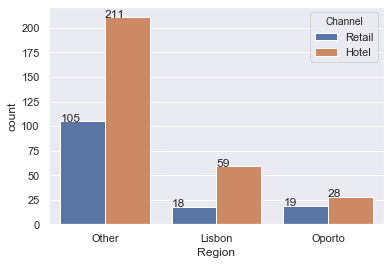

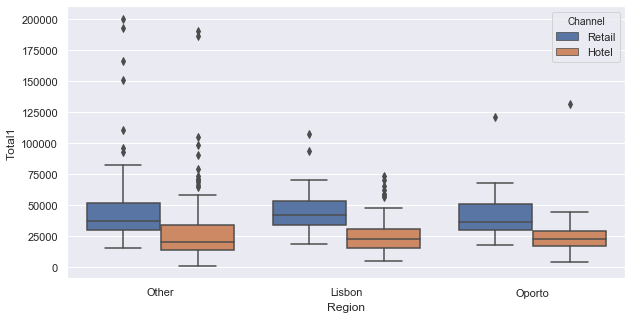

In [74]:
# Problem 1 starts here. This cell attends to only some preliminary analysis.
# Few initial preliminary analysis on the transaction count and the sales value distribution by each region and channels within it. 

df_customer=pd.read_csv('WholesaleCustomersData.csv')
df_customer['Total1']=df_customer.sum(axis=1,numeric_only=True)
df_count=sns.countplot(data=df_customer,x='Region',hue='Channel')
for i in df_count.patches:
    df_count.annotate(i.get_height(),(i.get_x(),i.get_height()))
    
plt.figure(figsize=(10,5))
sns.boxplot(df_customer['Region'],df_customer['Total1'],hue=df_customer['Channel'])
plt.show()



In [75]:
#Question 1.1  

for i in df_customer.columns:
    if i=='Total1':
        df_customer=df_customer.drop(columns='Total1');
df_customer['Total1']=df_customer.drop(columns=['Region','Channel','Buyer/Spender']).sum(axis=1)
# print(df_customer)
print('Printing crosstab')
pd.pivot_table
print(pd.crosstab(df_customer['Region'],df_customer['Channel'],values=df_customer['Total1'],aggfunc=[sum],margins=True))
print('\n\nPrinting pivot table by region and channel')
print(pd.pivot_table(df_customer,index=df_customer['Region'],columns=df_customer['Channel'], \
                     values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],\
                    aggfunc='sum').T)

print('\n\nPrinting pivot table by region')
print(pd.pivot_table(df_customer,index=df_customer['Region'], \
                     values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],\
                    aggfunc='sum',margins=True,margins_name='All').T)

print('\n\nPrinting pivot table by channel')
print(pd.pivot_table(df_customer,index=df_customer['Channel'], \
                     values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],\
                    aggfunc='sum',margins=True,margins_name='All').T)



Printing crosstab
             sum                   
Channel    Hotel   Retail       All
Region                             
Lisbon   1538342   848471   2386813
Oporto    719150   835938   1555088
Other    5742077  4935522  10677599
All      7999569  6619931  14619500


Printing pivot table by region and channel
Region                    Lisbon  Oporto    Other
                 Channel                         
Delicatessen     Hotel     70632   30965   320358
                 Retail    33695   23541   191752
Detergents_Paper Hotel     56081   13516   165990
                 Retail   148055  159795   724420
Fresh            Hotel    761233  326215  2928269
                 Retail    93600  138506  1032308
Frozen           Hotel    184512  160861   771606
                 Retail    46514   29271   158886
Grocery          Hotel    237542  123074   820101
                 Retail   332495  310200  1675150
Milk             Hotel    228342   64519   735753
                 Retail   194112  1

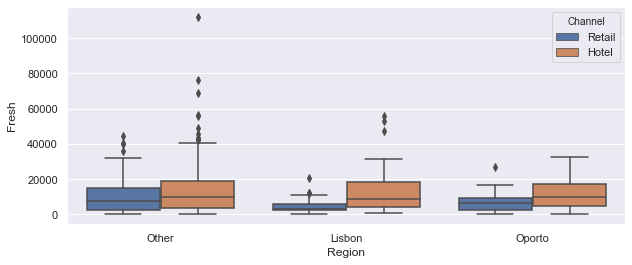

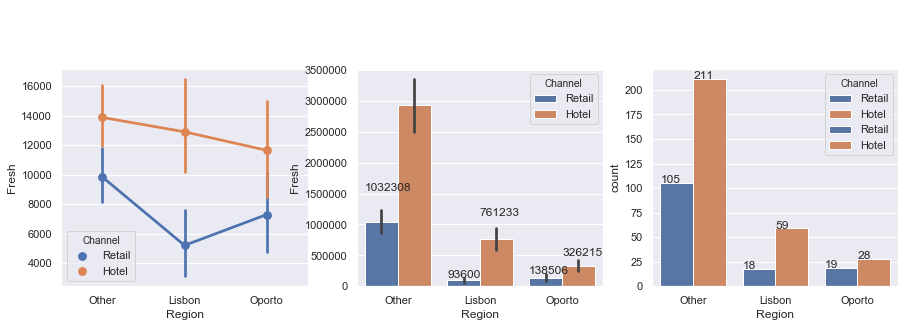

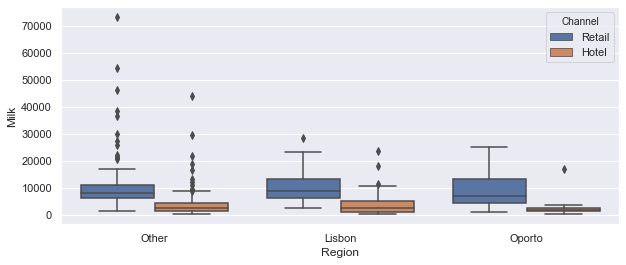

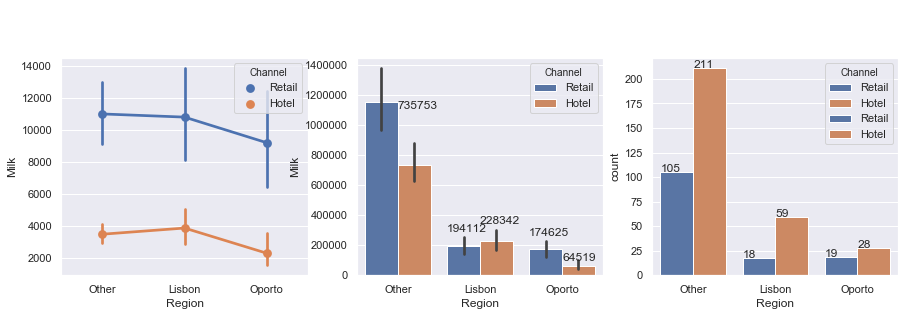

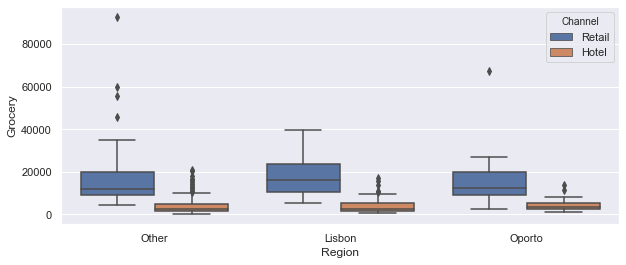

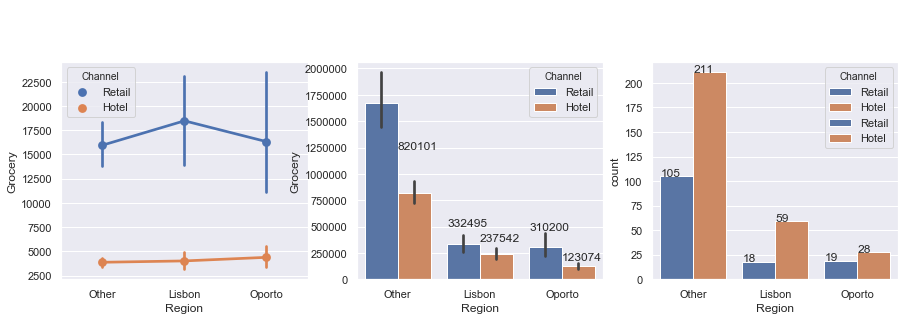

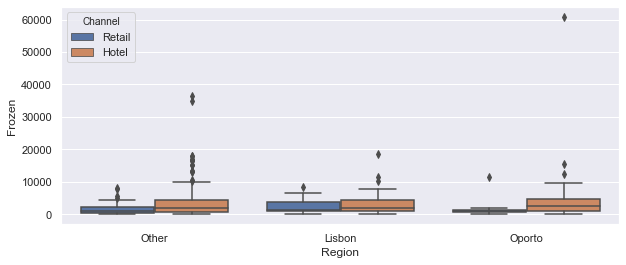

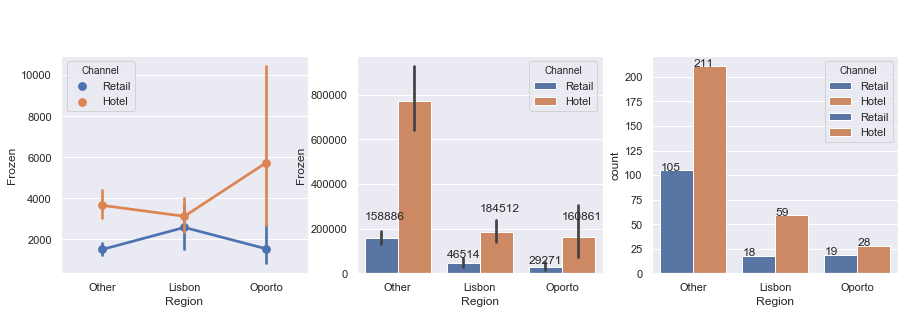

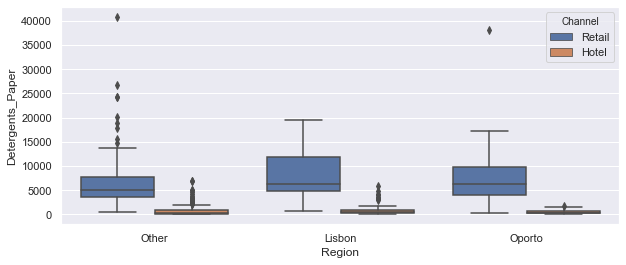

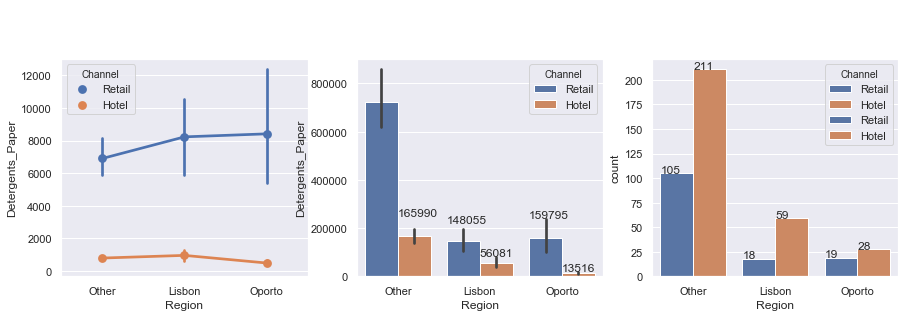

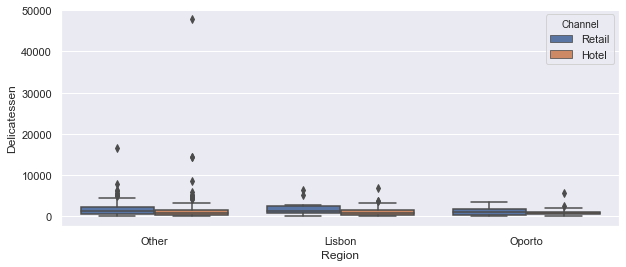

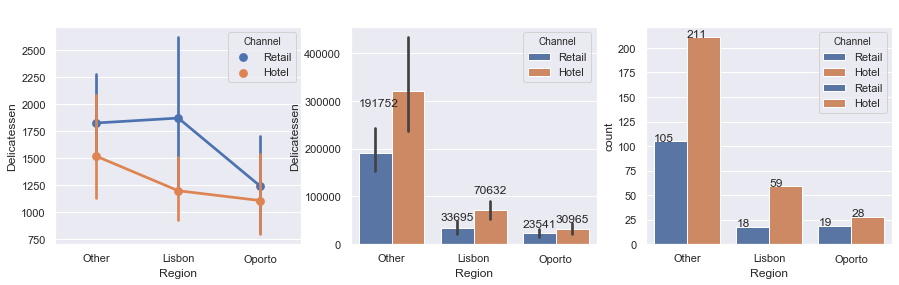

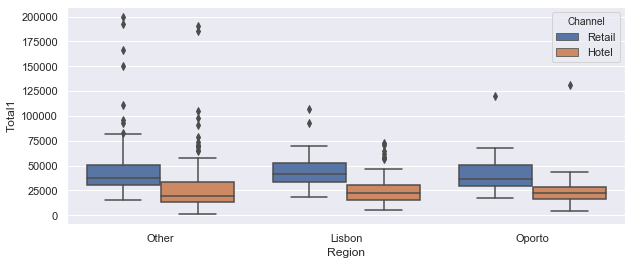

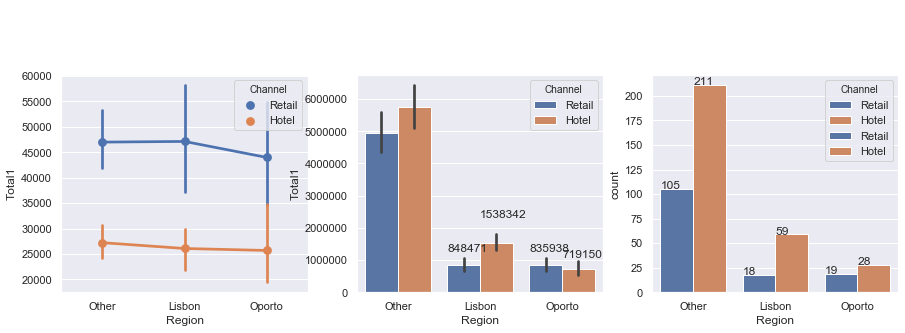

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total1
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [76]:
# Question 1.2 and 1.4 
# Understanding 6 different varieties on their similarities and outliers

for i in df_customer.columns: 
 
    if i not in ['Region','Channel','Buyer/Spender']:
        plt.figure(figsize=(10,4))
        sns.boxplot(df_customer['Region'],df_customer[i],hue=df_customer['Channel']);
        plt.show();
        
        #Plot sales mean by region 
        plt.figure(figsize=(15,4))
        plt.subplot(1,3,1);
        df_point=sns.pointplot(df_customer['Region'],df_customer[i],hue=df_customer['Channel']);
        for i in df_point.patches:
            df_point.annotate(i.get_height(),(i.get_x(),i.get_height()))
            
        #'Plot sales value by region and channel
        plt.subplot(1,3,2);
        df_bar=sns.barplot(df_customer['Region'],df_customer[i],hue=df_customer['Channel'],estimator=sum); 
        for i in df_bar.patches:
            df_bar.annotate(i.get_height(),(i.get_x(),i.get_height()*1.5));
            
        # Plot sales count by region and channel
        plt.subplot(1,3,3);
        df_count=sns.countplot(df_customer['Region'],hue=df_customer['Channel']); 
        for i in df_count.patches:
            df_count.annotate(i.get_height(),(i.get_x(),i.get_height()))
        sns.countplot(df_customer['Region'],hue=df_customer['Channel']);
        plt.show(); 
        
df_customer.describe()

In [77]:
# Question 1.3 
# Coefficient of variation. To find out variables that are most as well as least consistent.
df_CoV=df_customer.select_dtypes(include='int64').drop(columns=['Buyer/Spender'],axis=1).std()/\
                df_customer.select_dtypes(include='int64').drop(['Buyer/Spender'],axis=1).mean()
df_CoV=df_CoV.rename_axis('Items')
df_CoV=df_CoV.sort_values(ascending=False)
print(df_CoV)
# Please note that Delicatessen is least consistent followed by detergents_paper
# Please note that Fresh is most consistent followed by grocery.

Items
Delicatessen        1.849407
Detergents_Paper    1.654647
Frozen              1.580332
Milk                1.273299
Grocery             1.195174
Fresh               1.053918
Total1              0.793240
dtype: float64


Variables with greater co relations


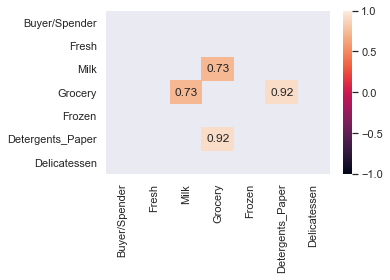

Variables with least co relations


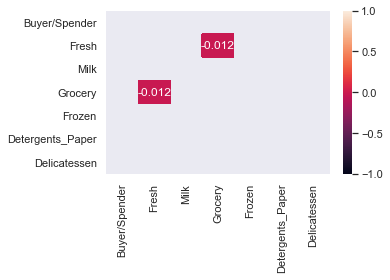

Full view of co relations


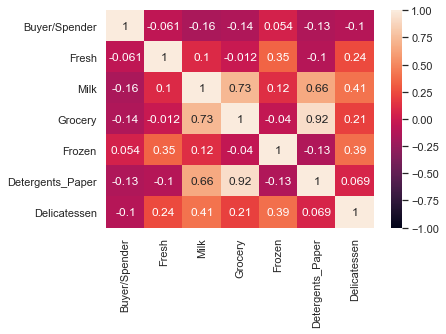

In [78]:
# Question 1.5
# Incremental analysis towards business report

#Coefficient of Correlation   
df_customer1=df_customer.drop(columns=['Total1'],axis=1)
df_corr_most_consistent1=df_customer1.corr()[df_customer1.corr().loc[:,:]>=0.70][df_customer1.corr().loc[:,:]<1] 
df_corr_most_consistent2=df_customer1.corr()[df_customer1.corr().loc[:,:]>=-1][df_customer1.corr().loc[:,:]<-0.7] 
df_corr_least_consistent=df_customer1.corr()[df_customer1.corr().loc[:,:]>=-0.02][df_customer1.corr().loc[:,:]<0.02] 
df_customer_corr=df_customer1.corr()
plt.figure(figsize=(5,3))
print('Variables with greater co relations')
sns.heatmap(df_corr_most_consistent1,annot=True,vmin=-1,vmax=1)
plt.show()
plt.figure(figsize=(5,3))
print('Variables with least co relations')
sns.heatmap(df_corr_least_consistent,annot=True,vmin=-1,vmax=1)
plt.show()
print('Full view of co relations')
sns.heatmap(df_customer_corr,annot=True,vmin=-1,vmax=1)
plt.show()

In [79]:
# Problem 2 starts

df_survey=pd.read_csv('Survey.csv')

In [80]:
# Question 2.1.1
dfct_GM=pd.crosstab(df_survey['Gender'],df_survey['Major'],margins=True).sort_values(by='All',axis=1,ascending=True)
dfct_GM


Major,Undecided,CIS,International Business,Accounting,Other,Management,Economics/Finance,Retailing/Marketing,All
Gender,,,,,,,,,
Female,0,3,4,3,3,4,7,9,33
Male,3,1,2,4,4,6,4,5,29
All,3,4,6,7,7,10,11,14,62


In [81]:
# Question 2.1.2
dfct_GG=pd.crosstab(df_survey['Gender'],df_survey['Grad Intention'],margins=True).sort_values(by='All',axis=1,ascending=True)
dfct_GG

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [82]:
# Question 2.1.3
dfct_GE=pd.crosstab(df_survey['Gender'],df_survey['Employment'],margins=True).sort_values(by='All',axis=1,ascending=True)
dfct_GE

Employment,Unemployed,Full-Time,Part-Time,All
Gender,,,,
Female,6,3,24,33
Male,3,7,19,29
All,9,10,43,62


In [83]:
# Question 2.1.4
dfct_GC=pd.crosstab(df_survey['Gender'],df_survey['Computer'],margins=True).sort_values(by='All',axis=1,ascending=True)
dfct_GC

Computer,Tablet,Desktop,Laptop,All
Gender,,,,
Female,2,2,29,33
Male,0,3,26,29
All,2,5,55,62


In [84]:
# Question 2.2.1 Part A
prob_male_given_all=(dfct_GM.loc['Male','All']/dfct_GM.loc['All','All'])*100
print('Probability that a randomly selected student will be a male is:'+"{:,.2f}".format(prob_male_given_all)+'%')

Probability that a randomly selected student will be a male is:46.77%


In [85]:
# Question 2.2.1 Part B
prob_female_given_all=(dfct_GM.loc['Female','All']/dfct_GM.loc['All','All'])*100
print('Probability that a randomly selected student will be a female is:'+"{:,.2f}".format(prob_female_given_all)+'%')

Probability that a randomly selected student will be a female is:53.23%


In [86]:
# Question 2.2.2 Part A
marginal_total_male_all=dfct_GM.loc['Male','All']
for i in dfct_GM.columns:
    if i!='All':
        prob_male_major=(dfct_GM.loc['Male',i]/marginal_total_male_all)*100
        print(str('Conditional probability of '+i+' major for male is: ').ljust(70," ")+'%3.2f'%(prob_male_major)+"%")

Conditional probability of Undecided major for male is:               10.34%
Conditional probability of CIS major for male is:                     3.45%
Conditional probability of International Business major for male is:  6.90%
Conditional probability of Accounting major for male is:              13.79%
Conditional probability of Other major for male is:                   13.79%
Conditional probability of Management major for male is:              20.69%
Conditional probability of Economics/Finance major for male is:       13.79%
Conditional probability of Retailing/Marketing major for male is:     17.24%


In [87]:
# Question 2.2.2 Part B
marginal_total_female_all=dfct_GM.loc['Female','All']
for i in dfct_GM.columns:
    if i!='All':
        prob_female_major=(dfct_GM.loc['Female',i]/marginal_total_female_all)*100
        print(str('Conditional probability of '+i+' major for female is: ').ljust(71," ")+'%3.2f'%(prob_female_major)+"%")

Conditional probability of Undecided major for female is:              0.00%
Conditional probability of CIS major for female is:                    9.09%
Conditional probability of International Business major for female is: 12.12%
Conditional probability of Accounting major for female is:             9.09%
Conditional probability of Other major for female is:                  9.09%
Conditional probability of Management major for female is:             12.12%
Conditional probability of Economics/Finance major for female is:      21.21%
Conditional probability of Retailing/Marketing major for female is:    27.27%


In [88]:
# Question 2.2.3 Part A
marginal_total_male_GG=dfct_GG.loc['Male','All']
for i in dfct_GG.columns:
    if i!='All':
        prob_intent_to_graduate_among_male=(dfct_GG.loc['Male',i]/marginal_total_male_GG)*100
        print(str('Conditional probability of graduate intention as '+i+' for a male is: ').ljust(75," ")+'%3.2f' %(prob_intent_to_graduate_among_male)+"%")

Conditional probability of graduate intention as No for a male is:         10.34%
Conditional probability of graduate intention as Undecided for a male is:  31.03%
Conditional probability of graduate intention as Yes for a male is:        58.62%


In [89]:
# Question 2.2.3 Part B
marginal_total_female_GG=dfct_GG.loc['Female','All']
for i in dfct_GG.columns:
    if i!='All':
        prob_intent_to_graduate_among_female=(dfct_GG.loc['Female',i]/marginal_total_female_GG)*100
        print(str('Conditional probability of graduate intention as '+i+' for a female is: ').ljust(75," ")+'%3.2f' %(prob_intent_to_graduate_among_female)+"%")

Conditional probability of graduate intention as No for a female is:       27.27%
Conditional probability of graduate intention as Undecided for a female is: 39.39%
Conditional probability of graduate intention as Yes for a female is:      33.33%


In [90]:
# Question 2.2.4 Part A
marginal_total_male_all=dfct_GE.loc['Male','All']
for i in dfct_GE.columns:
    if i!='All':
        prob_male_status=(dfct_GE.loc['Male',i]/marginal_total_male_all)*100
        print(str('Conditional probability of '+i+' status for male is: ').ljust(70," ")+'%3.2f'%(prob_male_status)+"%")

Conditional probability of Unemployed status for male is:             10.34%
Conditional probability of Full-Time status for male is:              24.14%
Conditional probability of Part-Time status for male is:              65.52%


In [91]:
# Question 2.2.4 Part B
marginal_total_female_all=dfct_GE.loc['Female','All']
for i in dfct_GE.columns:
    if i!='All':
        prob_female_status=(dfct_GE.loc['Female',i]/marginal_total_female_all)*100
        print(str('Conditional probability of '+i+' status for female is: ').ljust(70," ")+'%3.2f'%(prob_female_status)+"%")

Conditional probability of Unemployed status for female is:           18.18%
Conditional probability of Full-Time status for female is:            9.09%
Conditional probability of Part-Time status for female is:            72.73%


In [92]:
# Question 2.2.5 Part A
marginal_total_male_all=dfct_GC.loc['Male','All']
for i in dfct_GC.columns:
    if i!='All':
        prob_male_status=(dfct_GC.loc['Male',i]/marginal_total_male_all)*100
        print(str('Conditional probability of '+i+' preference for male is: ').ljust(70," ")+'%3.2f'%(prob_male_status)+"%")

# Answer is : Conditional probability of Laptop preferences for male is 89.66%

Conditional probability of Tablet preference for male is:             0.00%
Conditional probability of Desktop preference for male is:            10.34%
Conditional probability of Laptop preference for male is:             89.66%


In [93]:
# Question 2.2.5 Part B
marginal_total_female_all=dfct_GC.loc['Female','All']
for i in dfct_GC.columns:
    if i!='All':
        prob_female_status=(dfct_GC.loc['Female',i]/marginal_total_female_all)*100
        print(str('Conditional probability of '+i+' preference for female is: ').ljust(70," ")+'%3.2f'%(prob_female_status)+"%")

# Answer is : Conditional probability of Laptop preferences for female is 87.88%

Conditional probability of Tablet preference for female is:           6.06%
Conditional probability of Desktop preference for female is:          6.06%
Conditional probability of Laptop preference for female is:           87.88%


In [94]:
# Question 2.3
Total_students=dfct_GE.loc['All','All']
print('Probabilities of employment status among status');
print('-----------------------------------------------');

for i in dfct_GE.columns:
    if i!='All':
        prob_students_status=(dfct_GE.loc['All',i]/Total_students)*100
        print(str('Probability of '+i+' status among students is:').ljust(70," ")+"%3.2f"%(prob_students_status)+"%")

print('\n\nProbabilities on graduation intent across students');
print('--------------------------------------------------');
for i in dfct_GG.columns:
    if i!='All':
        prob_students_intent=(dfct_GG.loc['All',i]/Total_students)*100
        print(str('Probability of '+i+' for graduation intent among students is:').ljust(70," ")+"%3.2f"%(prob_students_intent)+"%")
print('\n\nProbabilities for each of the  major across students');
print('------------------------------------------------------');
for i in dfct_GM.columns:
    if i!='All':
        prob_students_major=(dfct_GM.loc['All',i]/Total_students)*100
        print(str('Probability of '+i+' intent among students is:').ljust(70," ")+"%3.2f"%(prob_students_major)+"%")
print('\n\nProbabilities on computer preferences across students');
print('---------------------------------------------------------');
for i in dfct_GC.columns:
    if i!='All':
        prob_students_computer_pref=(dfct_GC.loc['All',i]/Total_students)*100
        print(str('Probability of '+i+' preference among students is:').ljust(70," ")+"%3.2f"%(prob_students_computer_pref)+"%")

print('\n\nAnswer and justification as below:');
print('-------------------------------------')
print('Based on the marginal probabilities at the student level, the observations on conditional probabilities across the columns'),
print('for male and female are not independent of the Gender as they are different from marginal probabilities at the student level');

Probabilities of employment status among status
-----------------------------------------------
Probability of Unemployed status among students is:                   14.52%
Probability of Full-Time status among students is:                    16.13%
Probability of Part-Time status among students is:                    69.35%


Probabilities on graduation intent across students
--------------------------------------------------
Probability of No for graduation intent among students is:            19.35%
Probability of Undecided for graduation intent among students is:     35.48%
Probability of Yes for graduation intent among students is:           45.16%


Probabilities for each of the  major across students
------------------------------------------------------
Probability of Undecided intent among students is:                    4.84%
Probability of CIS intent among students is:                          6.45%
Probability of International Business intent among students is:       9.68%


1.Is Salary normally distributed?
-------------------------------
mean of Salary is 48.55
mode of Salary is 40.00
median of Salary is 50.00
Q1: 40.00, Mid:50.00, Q3:55.00, Skew_ind:-5.00


Based on the above Salary is left skewed


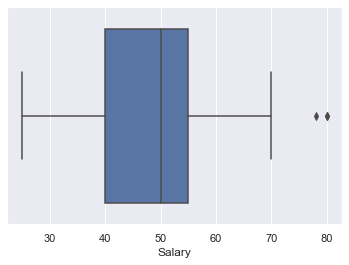

Answer and justification: Based on the above findings for Salary wherein the mean , mode and the median are different along with box plot suggesting that Salary is not normally distributed and is left skewed.


2.Is Spending normally distributed?
-------------------------------
mean of Spending is 482.02
mode of Spending is 500.00
median of Spending is 500.00
Q1: 312.50, Mid:500.00, Q3:600.00, Skew_ind:-87.50


Based on the above Spending is left skewed


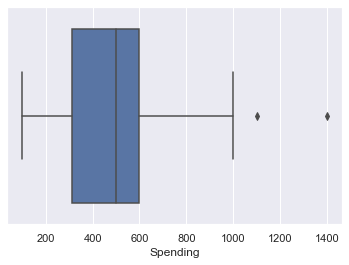

Answer and justification: Based on the above findings for Spending wherein the mean , mode and the median are different along with the box plot suggesting that is not normally distributed and is left skewed.


3.Is Text Messages normally distributed?
------------------------------------------
mean of Text Messages is 246.21
mode of Text Messages is 300.00
median of Text Messages is 200.00
Q1: 100.00, Mid:200.00, Q3:300.00, Skew_ind:0.00


Based on the above Text Messages is normally distributed


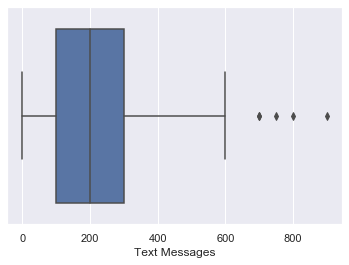

Answer and justification: Based on the above findings for Text Messages wherein  the mean , mode and the median are different the box plot suggests that it is not normally distributed.


In [95]:
# Question 2.4

print('1.Is Salary normally distributed?');
print('-------------------------------');
sns.boxplot(df_survey['Salary'])
print('mean of Salary is %3.2f' %(df_survey['Salary'].mean()))
print('mode of Salary is %3.2f' %(df_survey['Salary'].mode()[0]))
print('median of Salary is %3.2f' %(df_survey['Salary'].median()))
#Identifiying skewness in the distribution
q1,mid,q3=np.percentile(df_survey['Salary'],[25,50,75])
skew_ind=((q3-mid)-(mid-q1))
print('Q1: %3.2f, Mid:%3.2f, Q3:%3.2f, Skew_ind:%3.2f' %(q1,mid,q3,skew_ind))
print('\n\nBased on the above ', end='')
if skew_ind<0:
    print('Salary is left skewed')
elif skew_ind==0:
    print('Salary is normally distributed');
else:
    print('Salary is right skewed')

plt.show()
print('Answer and justification: Based on the above findings for Salary wherein the mean , mode and the median \
are different along with box plot suggesting that Salary is not normally distributed and is left skewed.');

print('\n\n2.Is Spending normally distributed?');
print('-------------------------------');
sns.boxplot(df_survey['Spending'])
print('mean of Spending is %3.2f' %(df_survey['Spending'].mean()))
print('mode of Spending is %3.2f' %(df_survey['Spending'].mode()[0]))
print('median of Spending is %3.2f' %(df_survey['Spending'].median()))
#Identifiying skewness in the distribution
q1,mid,q3=np.percentile(df_survey['Spending'],[25,50,75])
skew_ind=((q3-mid)-(mid-q1))
print('Q1: %3.2f, Mid:%3.2f, Q3:%3.2f, Skew_ind:%3.2f' %(q1,mid,q3,skew_ind))
print('\n\nBased on the above ', end='')
if skew_ind<0:
    print('Spending is left skewed')
elif skew_ind==0:
    print('Spending is normally distributed');
else:
    print('Spending is right skewed')
plt.show()
print('Answer and justification: Based on the above findings for Spending wherein the mean , mode and the median \
are different along with the box plot suggesting that is not normally distributed and is left skewed.');

print('\n\n3.Is Text Messages normally distributed?');
print('------------------------------------------');
sns.boxplot(df_survey['Text Messages'])
print('mean of Text Messages is %3.2f' %(df_survey['Text Messages'].mean()))
print('mode of Text Messages is %3.2f' %(df_survey['Text Messages'].mode()[0]))
print('median of Text Messages is %3.2f' %(df_survey['Text Messages'].median()))
#Identifiying skewness in the distribution
q1,mid,q3=np.percentile(df_survey['Text Messages'],[25,50,75])
skew_ind=((q3-mid)-(mid-q1))
print('Q1: %3.2f, Mid:%3.2f, Q3:%3.2f, Skew_ind:%3.2f' %(q1,mid,q3,skew_ind))
print('\n\nBased on the above ', end='')
if skew_ind<0:
    print('Text Messages is left skewed')
elif skew_ind==0:
    print('Text Messages is normally distributed');
else:
    print('Text Messages is right skewed')
plt.show()
print('Answer and justification: Based on the above findings for Text Messages wherein  the mean , mode and the median \
are different the box plot suggests that it is not normally distributed.');


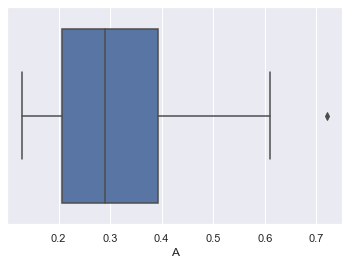

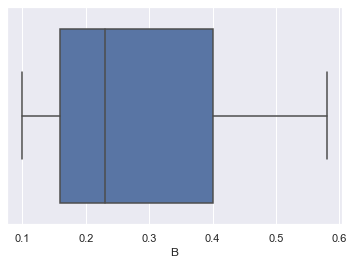

Std deviation for A Shingles is: 0.135731 while mean is 0.316667
Std deviation for B Shingles is: 0.137296 while mean is 0.273548


In [96]:
#Problem 3 starts here

#3.1

# Hypothesis to be considered as below:
# -------------------------------------
# H0 is Sample mean for A Shingles <= Sample mean of B Shingles
# H1 is Sample mean for A Shingles > Sample mean of B Shingles

# Assumptions being made before the test for equality of means is performed as below:
# -----------------------------------------------------------------------------------
# 1.We have two samples but do not have population standard deviation. 
# 2.However sample standard deviation can be derived
# 3. Hence this has to be 2 sample T test
# 4. Alpha value to be assumed as 0.05 since it is not explicity stated
# 5. Since the manufacturer is claiming that the mean moisture weight per 100 sq feet cannot be greater than 0.35\
#   we are to prove the reverse of it through a null hypothesis to ascertain if the statistics alludes to \
#   the fact that the mean weight of the dried shingles would be greater than or equal to 0.35 per 100 sq. feet.
# 6. Both samples are different in sizes and hence the paired 2 sample T test is ruled out.
# 7. Since this is a comparative study on two samples before and after drying the Shingles we shall proceed with paired t test. 
# 8. Since the sample size is different across the samples(B Shingles) with the second sample containing lesser sample size than
#   first one (A Shingles) we shall avoid NaN's on the second sample to enable the test.


df_shingles=pd.read_csv('AandBshingles.csv')
sns.boxplot(df_shingles['A'])
plt.show()
sns.boxplot(df_shingles['B'])
plt.show()
sample_stdev_A=df_shingles['A'].std()
sample_mean_A=df_shingles['A'].mean()
print('Std deviation for A Shingles is: %3.6f while mean is %3.6f' %(sample_stdev_A, sample_mean_A))
sample_stdev_B=df_shingles['B'].std()
sample_mean_B=df_shingles['B'].mean()
print('Std deviation for B Shingles is: %3.6f while mean is %3.6f' %(sample_stdev_B, sample_mean_B))

# 3.1 continued in the next cell

In [97]:
# 3.1 continued

t_statistic, p_value  = stats.ttest_rel(df_shingles['A'],df_shingles['B'],nan_policy='omit')
print('t_statistic %3.6f  p_value %3.2f' %(t_statistic, p_value))
alpha_level = 0.05


if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean moisture content across A and B Shingles are the same and does not favour companys claim.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean moisture content across A and B shingles are unequal favouring the companys claim.')
    


t_statistic 0.844501  p_value 0.41
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the mean moisture content across A and B shingles are unequal favouring the companys claim.


In [98]:
# Question 3.2 pre work
# Perform the one sample t test to clarify the assumptions on hypothesis testing outcome for Shingles A and B seperately
# This is to establish the assumption that Null hypothesis for A is a reject whereas for B is a fail to reject.

t_statisticA, p_valueA = ttest_1samp(df_shingles['A'], 0.35)
t_statisticB, p_valueB = ttest_1samp(df_shingles['B'].dropna(), 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statisticA, p_valueA))
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statisticB, p_valueB))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.14955266289815025 
One sample t test 
t statistic: -3.1003313069986995 p value: 0.004180954800638363 


In [99]:
# Question 3.2 response:
# Assumptions required on the population distribution
# 1. Population across samples for Shingles A and B are normally distributed
# 2. Null hypothesis is a "fail to reject" based on samples for Shingles A that it leads to the population mean weight as <= 0.35
# 3. Null hypothesis is a "reject" based on samples for on Shingles B that it leads to the population mean weight as <= 0.35